<a href="https://colab.research.google.com/github/soumasispal/Online-Fraud-Detection/blob/main/Online_Fraud_Detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Online Fraud Detection**

## Project Type - Classification
## Name - Soumasis Pal
## Cohort - Delhi


# **Project Summary**




Online fraud detection systems employ sophisticated algorithms and techniques to safeguard financial transactions by identifying potentially fraudulent activity. These systems rely on varioud factors, including user behavior and location analysis, to detect anomalies and patterns and protect users from unauthorized transactions.

One of the crucial elements in credit card fraud detection is the examination of user behavior patterns. By analyzing a user's spending habits and transaction history, the system can establish a baseline for their typical financial activity. This baseline includes details such as the types of transactions they commonly make, the merchants they frequent, and the amounts they usually spend. Any deviation from this established pattern can raise a red flag. In addition to monitoring user behavior, credit card fraud detection systems also take into account geographical data. They track the locations where a user typically conducts transactions, including the cities or countries they frequent. If a transaction occurs in an unusual geographic location, it can be considered suspicious. For instance, if a user primarily makes purchases in their home city but a transaction is initiated from a distant location, it may trigger suspicion.


**Objective** - To develop a fraud detection system using machine learning to protect customers from fraudulent transactions.

**Let's Start**

**Import Libraies**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

**Data Set Loading**

I have used dataset from kaggle.

Link : https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection?resource=download

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
File_path="/content/drive/MyDrive/Datasets/onlinefraud.csv"
df = pd.read_csv(File_path)

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Dataset Rows & Columns count**

In [8]:
df.shape

(6362620, 11)

In [9]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Check for Duplicates**

In [11]:
df.duplicated().sum()

0

**Check for missing values**

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no duplicates values.

In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
#Check for unique values
import pandas as pd

def check_unique_values(dataset, features):
    for feature in features:
        unique_values = dataset[feature].unique()
        print(f"Unique values for '{feature}':")
        print(unique_values)
        print("\n")


features_to_check = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                     'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

check_unique_values(df, features_to_check)


Unique values for 'step':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 

<Axes: >

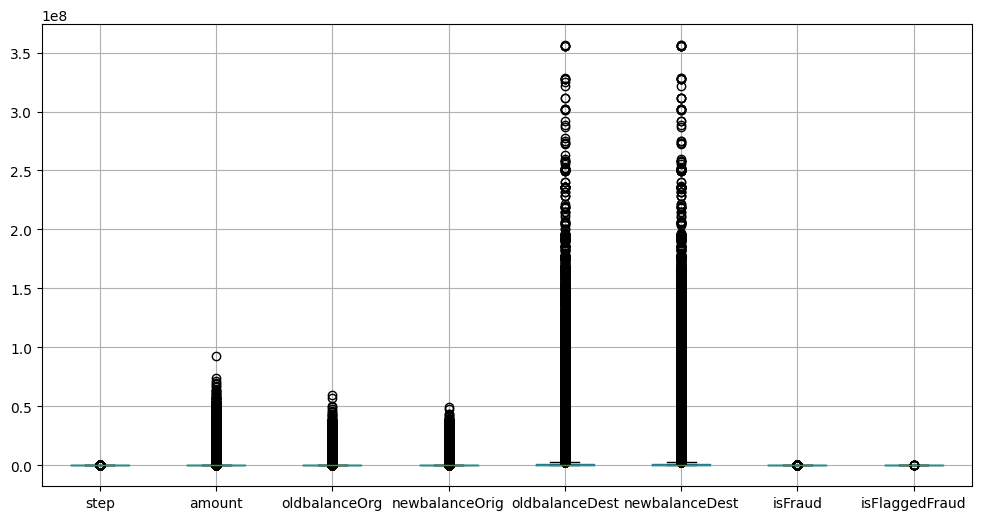

In [17]:
df.boxplot(figsize=(12,6))

**Handling outliers**

In [18]:
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate quantiles for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1


def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(df)) * 100
        return column, percentage

columns_with_outliers = [detect_outliers(column) for column in numeric_columns.columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")

Column: step, Percentage of outliers: 1.61%
Column: amount, Percentage of outliers: 5.31%
Column: oldbalanceOrg, Percentage of outliers: 17.49%
Column: newbalanceOrig, Percentage of outliers: 16.56%
Column: oldbalanceDest, Percentage of outliers: 12.36%
Column: newbalanceDest, Percentage of outliers: 11.61%
Column: isFraud, Percentage of outliers: 0.13%
Column: isFlaggedFraud, Percentage of outliers: 0.00%


In [9]:
# removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [10]:
low_leadtime,high_leadtime=remove_outlier(df['newbalanceOrig'])
df['newbalanceOrig']=np.where(df['newbalanceOrig']>high_leadtime,high_leadtime,df['newbalanceOrig'])
df['newbalanceOrig']=np.where(df['newbalanceOrig']<low_leadtime,low_leadtime,df['newbalanceOrig'])

In [11]:
low_leadtime,high_leadtime=remove_outlier(df['newbalanceDest'])
df['newbalanceDest']=np.where(df['newbalanceDest']>high_leadtime,high_leadtime,df['newbalanceDest'])
df['newbalanceDest']=np.where(df['newbalanceDest']<low_leadtime,low_leadtime,df['newbalanceDest'])

**Visualizing the data**

Text(0.5, 1.0, 'Distribution of Transaction Types')

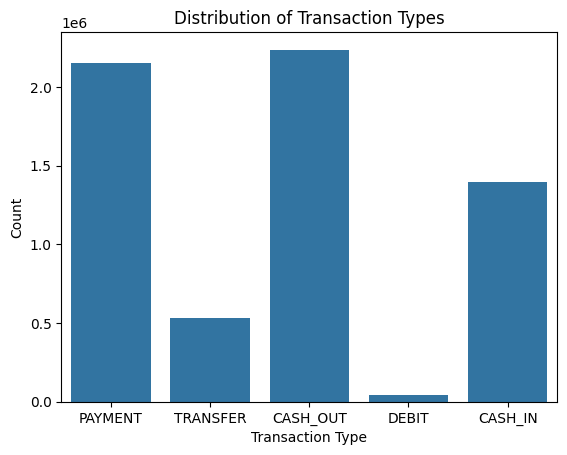

In [22]:
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')

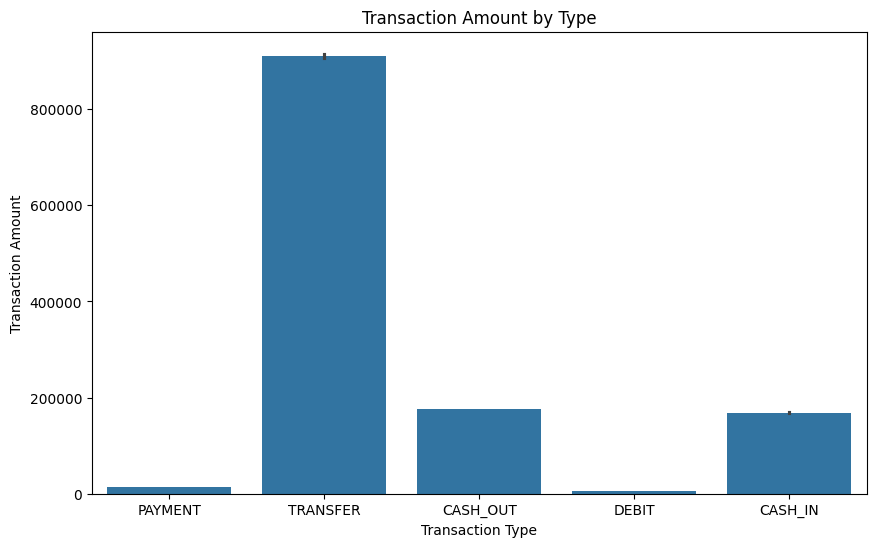

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='amount')
plt.xticks(rotation=0)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

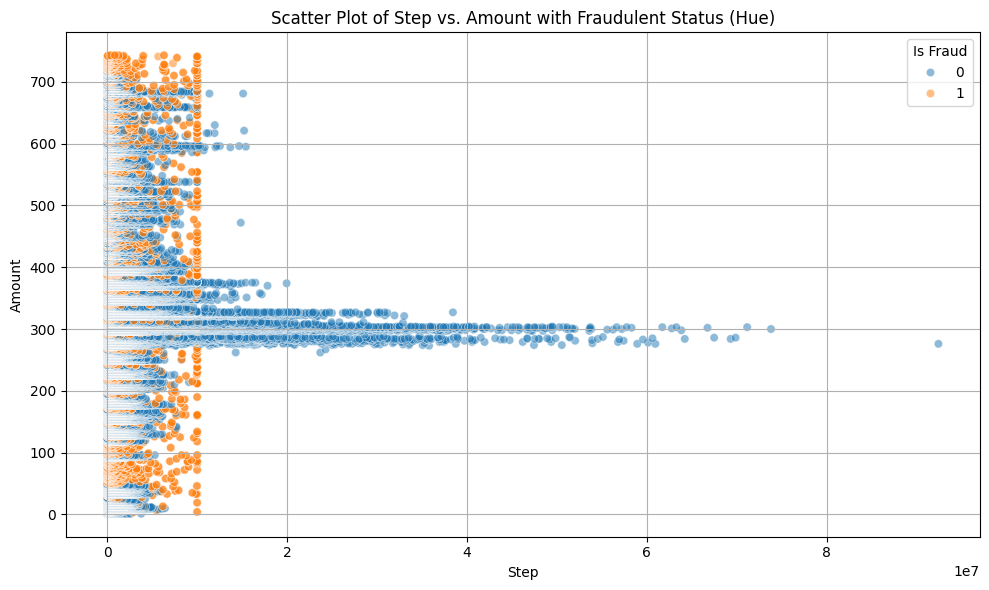

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()

<ipython-input-25-787941b06462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


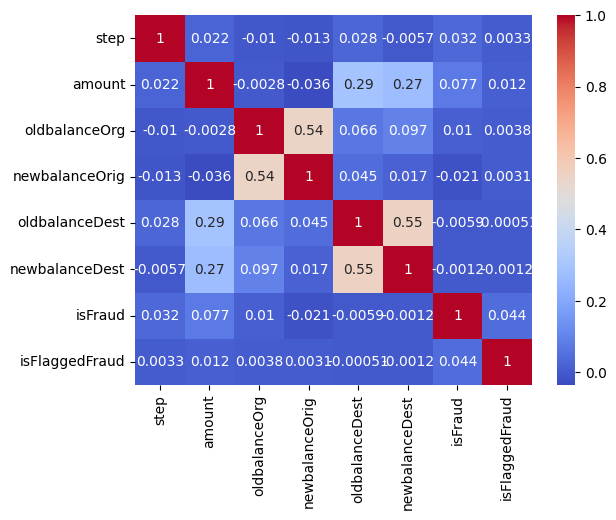

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Handling Missing Value**

In [8]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [13]:
def check_missing_values(df):
     missing_values = df.isnull().sum()
     missing_info = pd.DataFrame({'Column Name': df.columns, 'MissingValues': missing_values})
     return missing_info


missing_info = check_missing_values(df)
print(missing_info)

                   Column Name  MissingValues
step                      step              0
type                      type              0
amount                  amount              0
nameOrig              nameOrig              0
oldbalanceOrg    oldbalanceOrg              0
newbalanceOrig  newbalanceOrig              0
nameDest              nameDest              0
oldbalanceDest  oldbalanceDest              0
newbalanceDest  newbalanceDest              0
isFraud                isFraud              0
isFlaggedFraud  isFlaggedFraud              0


In [12]:
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

<ipython-input-12-0d92922c71bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest   -0.001172
oldbalanceDest   -0.005885
newbalanceOrig   -0.021092
Name: isFraud, dtype: float64


**Data Preprocessing**

In [14]:
data_new = pd.get_dummies(df, columns=['type'], prefix=['type'])
data_new.shape

(6362620, 15)

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data_new['nameOrig']=le.fit_transform(data_new['nameOrig'])
data_new['nameDest']=le.fit_transform(data_new['nameDest'])

In [16]:
data_new['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [23]:
data_new.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

**Model : Decision Tree**

In [24]:
# splitting the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
x = np.array(data_new[["type_CASH_IN","type_CASH_OUT","type_DEBIT","type_PAYMENT","type_TRANSFER" ,"amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data_new[["isFraud"]])

In [25]:
# Model fitting
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=15)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [26]:
#Check for accuracy
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997092392756443


In [27]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635443
           1       0.89      0.88      0.89       819

    accuracy                           1.00    636262
   macro avg       0.94      0.94      0.94    636262
weighted avg       1.00      1.00      1.00    636262



**I have bulit a model with 99.97% accuracy and recall value is 0.88 and f1 score is 0.89. So we can say that the model is quite accurate.**